In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

In [3]:
seed = 111
np.random.seed(seed)
sns.set(style="white")

color_names = ["red",
               "windows blue",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "light cyan",
               "steel blue",
               "pastel purple",
               "mint",
               "salmon"]

colors = sns.xkcd_palette(color_names)

In [4]:
def _plot_segments(ax, segmentation, ymin, ymax):
    s_seq = np.squeeze(segmentation)
    z_cps = np.concatenate(
        ([0], np.where(np.diff(s_seq))[0]+1, [s_seq.size]))
    for start, stop in zip(z_cps[:-1], z_cps[1:]):
        stop = min(s_seq.size, stop+1)
        ax.axvspan(
            start, stop-1, ymin=ymin, ymax=ymax,
            alpha=.8, facecolor=colors[s_seq[start]])

In [5]:
def make_seq(h=10, T=100):
    y = np.random.randint(h)
    seq = []
    z_seq = []
    v = np.random.uniform(-0.5, 0.5)
    for i in range(T):
        z_seq.append(0 if v < 0 else 1)
        seq.append(y + np.random.randn(1) * 0.1)
        y += v
        if y > h:
            v = -v
        elif y < 0:
            v = -v
    return np.array(seq), np.array(z_seq)

In [6]:
def make_seq_noise(h=10, T=100):
    y = np.random.randint(h)
    seq = []
    z_seq = []
    direction = np.random.choice([-1, 1])
    v = np.random.uniform(0.3, 0.5)
    for i in range(T):
        z_seq.append(0 if direction < 0 else 1)
        seq.append(y + np.random.randn(1) * 0.1)
        # add noise to dynamics
        delta =  direction * np.max([v + np.random.randn(1) * 0.1, 0.1])
        y += delta
        if y > h or y < 0:
            direction = -direction
            y = np.clip(y,0, h )
    return np.array(seq), np.array(z_seq)

Segment lengths: [13, 30, 29, 28]
Number of segments: 4
Average segment length: 25.0


/usr/local/Caskroom/miniforge/base/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


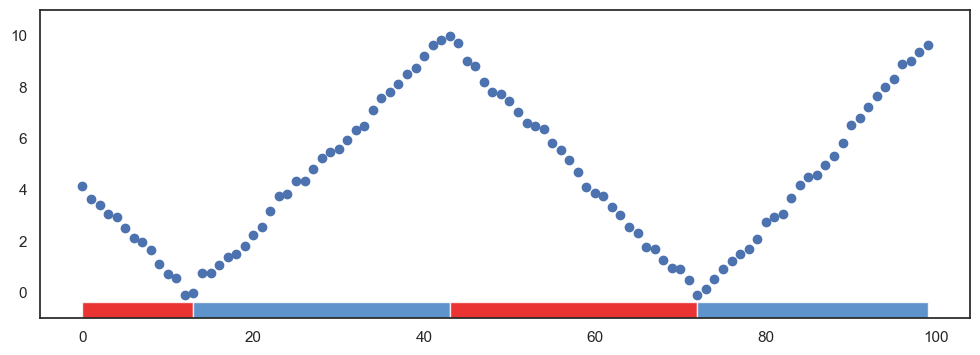

In [7]:
def calculate_segment_lengths(z_seq):

    lengths = []
    current_length = 1
    
    for i in range(1, len(z_seq)):
        if z_seq[i] == z_seq[i-1]:
            current_length += 1
        else:
            
            lengths.append(current_length)
            current_length = 1
    
    # Append the last segment length
    lengths.append(current_length)
    
    return lengths

# Example usage:
y_seq, z_seq = make_seq_noise()
segment_lengths = calculate_segment_lengths(z_seq)
print("Segment lengths:", segment_lengths)
print("Number of segments:", len(segment_lengths))
print("Average segment length:", np.mean(segment_lengths))
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

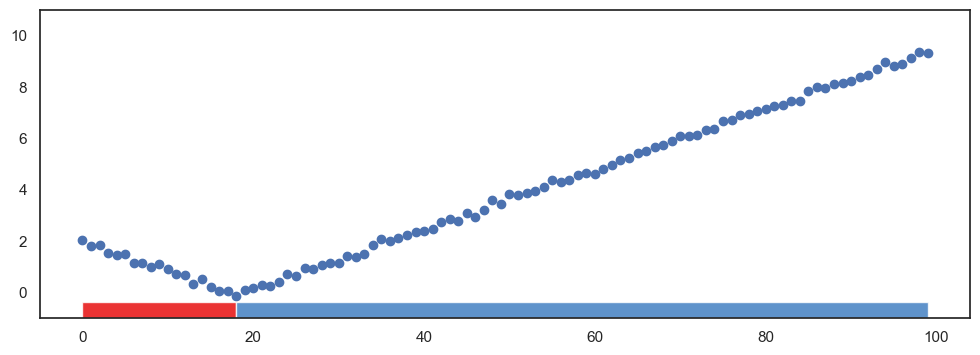

In [8]:
y_seq, z_seq = make_seq()
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [9]:
data_y = []
data_z = []
for i in tqdm(range(100000)):
    dy, dz = make_seq()
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

  0%|          | 0/100000 [00:00<?, ?it/s]

 15%|█▍        | 14766/100000 [00:04<00:26, 3160.97it/s]


KeyboardInterrupt: 

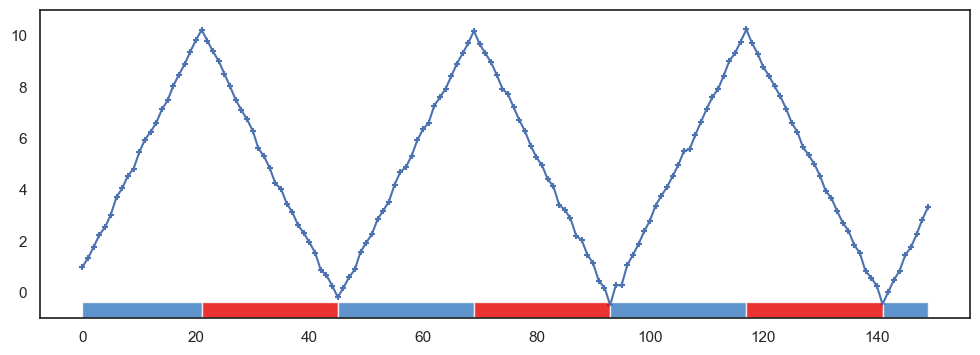

In [167]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(150), y_seq, s=25, marker='+')
ax.plot(np.arange(150), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [153]:
np.savez('bouncing_ball.npz', y=data_y, z=data_z)

In [7]:
data_y = []
data_z = []
for i in tqdm(range(3000)):
    dy, dz = make_seq(T=150)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:01<00:00, 2005.74it/s]


((3000, 150, 1), (3000, 150))

In [8]:
np.savez('bouncing_ball_calibration.npz', y=data_y, z=data_z)

In [10]:
data_y = []
data_z = []
for i in tqdm(range(1000)):
    dy, dz = make_seq(T=1000)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

100%|██████████| 1000/1000 [00:03<00:00, 318.49it/s]


((1000, 1000, 1), (1000, 1000))

In [11]:
np.savez('bouncing_ball_test_1000.npz', y=data_y, z=data_z)

## generate noisy versions

In [168]:
data_y = []
data_z = []
for i in tqdm(range(100000)):
    dy, dz = make_seq_noise()
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

  0%|          | 0/100000 [00:00<?, ?it/s]

/usr/local/Caskroom/miniforge/base/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 100000/100000 [03:21<00:00, 496.41it/s]


((100000, 100, 1), (100000, 100))

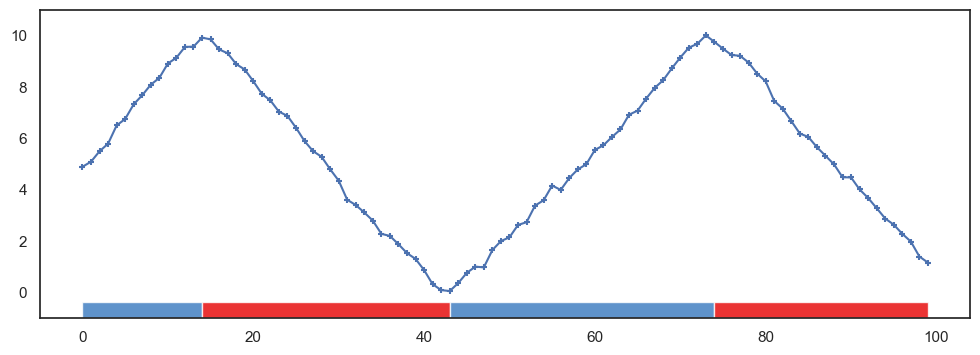

In [170]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(100), y_seq, s=25, marker='+')
ax.plot(np.arange(100), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [171]:
np.savez('bouncing_ball_noisy.npz', y=data_y, z=data_z)

In [174]:
# 3000 for calibration, 1000 for test
data_y = []
data_z = []
for i in tqdm(range(3000)):
    dy, dz = make_seq_noise(T=150)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

100%|██████████| 3000/3000 [00:09<00:00, 323.10it/s]


((3000, 150, 1), (3000, 150))

In [175]:
np.savez('bouncing_ball_noisy_calibration.npz', y=data_y, z=data_z)

In [ ]:
data_y = []
data_z = []
for i in tqdm(range(1000)):
    dy, dz = make_seq_noise(T=150)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

In [12]:
data_y = []
data_z = []
for i in tqdm(range(1000)):
    dy, dz = make_seq_noise(T=1000)
    data_y.append(dy)
    data_z.append(dz)
data_y = np.asarray(data_y)
data_z = np.asarray(data_z)
data_y.shape, data_z.shape

100%|██████████| 1000/1000 [00:21<00:00, 47.22it/s]


((1000, 1000, 1), (1000, 1000))

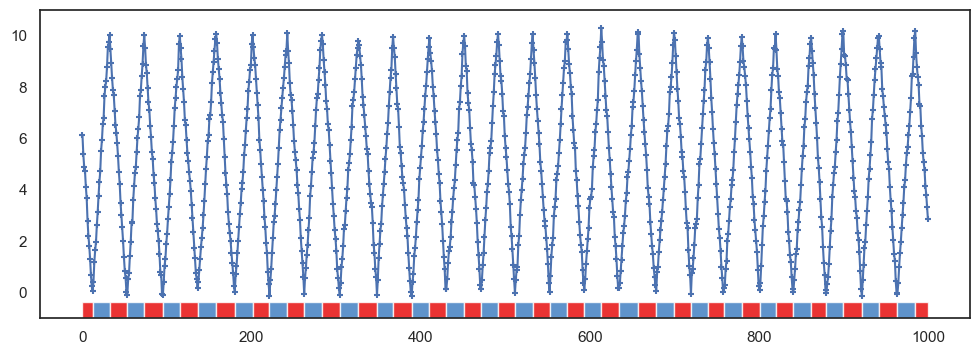

In [20]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
ax.scatter(np.arange(len(y_seq)), y_seq, s=25, marker='+')
ax.plot(np.arange(len(y_seq)), y_seq)
ax.set_ylim([-1, 11.])
_plot_segments(ax, z_seq, 0., 0.05)
plt.show()

In [63]:

def find_phase_changes(phases):
    # Calculate the difference between consecutive elements
    diff = np.diff(phases)
    
    # Find the indices where the difference is not zero (i.e., where the phase changes)
    change_indices = np.where(diff != 0)[0]
    
    # Add 1 to the indices to get the position of the change in the original array
    change_indices += 1
    
    return np.concatenate([[0], change_indices, [len(phases)]])

find_phase_changes(z_seq)

array([   0,   12,   32,   53,   73,   95,  115,  136,  158,  180,  201,
        221,  242,  262,  283,  304,  326,  348,  367,  389,  410,  430,
        451,  471,  491,  511,  532,  552,  573,  593,  613,  634,  657,
        678,  699,  719,  739,  758,  779,  800,  819,  840,  861,  879,
        899,  921,  941,  963,  984, 1000])

In [60]:
phase_changes

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_data(y_seq, y_pred, z_seq, name1, name2):
    # Data simulation
    lens = 100
    time = np.linspace(0, lens,lens)
    #input_signal = np.sin(0.1 * time)  # Simulated input signal
    #reconstruction_signal = np.sin(0.1 * time + 0.1)  # Simulated reconstructed signal with slight lag

    input_signal = y_seq[:lens]
    reconstruction_signal = y_pred[:lens]
    y_max = max(input_signal[:lens])+1
    y_min = min(input_signal[:lens])-1

    # Regions: going down (blue), going up (red)
    ground_truth_phases = np.array([0, 1] * 5)  # Simulate ground truth pattern
    phase_changes = np.linspace(0, 100, len(ground_truth_phases)+1)
    phase_changes_pred = find_phase_changes(z_seq[:lens])

    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(10, 2))

    # Plot input and reconstruction
    ax.plot(time, input_signal, label="Input", color="black")
    ax.plot(time, reconstruction_signal, label="Reconstruction", linestyle="--", color="black")

    for i, phase in enumerate(phase_changes_pred[:-1]):
        ph = z_seq[phase]
        if ph == 0:
            color = 'lightblue'
        else:
            color = 'lightcoral'
        ax.add_patch(Rectangle((phase_changes_pred[i], -1), phase_changes_pred[i+1] - phase_changes_pred[i], y_max, facecolor=color, alpha=0.5))

    # Customize the plot
    ax.set_xlim(0, 100)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Time")
    ax.set_ylabel("Signal")
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, 101, 20))

    # Legend    
    handles = [Rectangle((0, 0), 1, 1, color='lightblue', alpha=0.5, label='going down'),
            Rectangle((0, 0), 1, 1, color='lightcoral', alpha=0.5, label='going up'),
            plt.Line2D([0], [0], color="black", lw=1, label='Input'),
            plt.Line2D([0], [0], color="black", lw=1, linestyle="--", label='Reconstruction')]

    #ax.legend(handles=handles, loc='upper left',  bbox_to_anchor=(-0.3, 1))

    # Labels for rows
    ax.text(-20, 2.1, name1, fontsize=15, va='center')
    ax.text(-20, 0, name2, fontsize=15, va='center')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
np.savez('bouncing_ball_noisy_test_1000.npz', y=data_y, z=data_z)

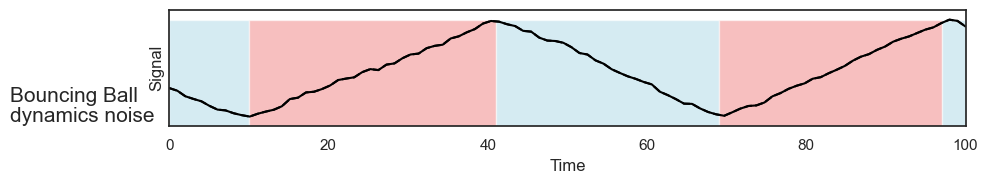

In [110]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
plot_data(y_seq, z_seq, 'Bouncing Ball', 'dynamics noise')

In [ ]:
idx = np.random.randint(data_y.shape[0])
y_seq, z_seq = data_y[idx], data_z[idx]
plot_data(y_seq, z_seq, 'Bouncing Ball', 'dynamics noise')